## Python Translate Script

* Install
`conda install biopython`
`conda install seaborn`

In [1]:
# Import
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

### 1. Function *get_sequences_from_file*

Description: Gets the sequences from file by species name

Arguments: 
fasta_n file

Return: a dictionary with species name and sequence


Output: fasta_n file with sequence by species name

`def get_sequences_from_file(fasta_fn): #retrieve file fasta_fn
    sequence_data_dict = {} #prepare dictionary for sequence data only
    for record in SeqIO.parse(fasta_fn, "fasta"): #Record is the handle to iterate using SeqIO.parse within the fasta_fn file in fasta format
        description = record.description.split() #Split the sequence description
        species_name = description[1] + " " + description[2] #Put a space between each description
        sequence_data_dict[species_name] = record.seq #Sequence data by species name
    return(sequence_data_dict)`


In [2]:
#An example
def get_sequences_from_file(fasta_fn): 
    sequence_data_dict = {} 
    for record in SeqIO.parse(fasta_fn, "fasta"): 
        description = record.description.split() 
        species_name = description[1] + " " + description[2] 
        sequence_data_dict[species_name] = record.seq 
    return(sequence_data_dict)
penguin_seq = get_sequences_from_file("penguins_cytb.fasta")
print(penguin_seq)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

## 2. Function *translate_function*

Description: Translates nucleotides into amino acids, excluding stop codons

Arguments: 
string_nucleotides

Return: amino acid string

Output: amino acid translated list

Inspired by: Convert object into string with Python https://www.educba.com/python-object-to-string/

`def translate_function(string_nucleotides):
    codons = [(string_nucleotides[i:i + 3]) for i in range(0, len(string_nucleotides), 3)] # make codons a list iterate over every codon
    aa_seq_list = [] # empty list we'll need to put amino acids into
    stop_codons = ["TAA", "TAG", "AGA", "AGG"] 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    for codon in codons: 
        if codon not in stop_codons:
            aa_seq_list.append(mito_table.forward_table[codon])
        else:
           aa_seq_list.append("")
        #print(mito_table.forward_table[codon]) # take every amino acid from codon table and append    
    #print(aa_seq_string)
    #aa_seq_list.pop()
    aa_seq_string = ''.join(aa_seq_list)
    return(aa_seq_string)`

In [3]:
#An example
def translate_function(string_nucleotides):
    codons = [(string_nucleotides[i:i + 3]) for i in range(0, len(string_nucleotides), 3)] # make codons a list iterate over every codon
    aa_seq_list = [] # empty list we'll need to put amino acids into
    stop_codons = ["TAA", "TAG", "AGA", "AGG"] 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    for codon in codons: 
        if codon not in stop_codons:
            aa_seq_list.append(mito_table.forward_table[codon])
        else:
           aa_seq_list.append("")
        #print(mito_table.forward_table[codon]) # take every amino acid from codon table and append    
    #print(aa_seq_string)
    #aa_seq_list.pop()
    aa_seq_string = ''.join(aa_seq_list)
    return(aa_seq_string)
print(translate_function(penguin_seq["Aptenodytes forsteri"]))


MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


## 3. Alternative Function Using BioPython

BioPython: .translate

Description: Translates nucleotides into amino acids, excluding stop codons

Arguments: penguin_seq

Output: amino acid translated list

Inspired by: https://biopython.org/docs/1.75/api/Bio.Seq.html

In [4]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
coding_dna = penguin_seq['Aptenodytes forsteri']
print(coding_dna.translate(table=mito_table, cds=True))

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


## 4. Function *compute_molecular_weight*

Description: Computes molecular weight from amino acids

Arguments: biopy_aa_seq_string

Return: mol_weight

Output: molecular weight integer


Inspired by: https://biopython.org/docs/1.75/api/Bio.Seq.html and https://biopython.org/wiki/ProtParam

`def compute_molecular_weight(biopy_aa_seq_string):
    prot_analysis = ProteinAnalysis(biopy_aa_seq_string)
    mol_weight = prot_analysis.molecular_weight()
    return(mol_weight)`

In [5]:
#Example using 1 species
def compute_molecular_weight(biopy_aa_seq_string):
    prot_analysis = ProteinAnalysis(biopy_aa_seq_string)
    mol_weight = prot_analysis.molecular_weight()
    return(mol_weight)
translate_A_forsteri = translate_function(penguin_seq["Aptenodytes forsteri"])
mol_weight_A_forsteri = compute_molecular_weight(translate_A_forsteri)
print(mol_weight_A_forsteri)

42459.602100000004


In [6]:
#Easy way to check if function worked using Biopython
protein_seq = (translate_A_forsteri)
analysed_seq = ProteinAnalysis(protein_seq)
analysed_seq.molecular_weight()

42459.602100000004

## 5.  Function *gc_count*

Description: Computes percent G and C nucleotides from nucleotide sequence

Arguments: string_nucleotides

Return: gc_percent

Output: gc_count

Inspired by: https://biopython.org/docs/1.75/api/Bio.SeqUtils.ProtParam.html

`def gc_count(string_nucleotides):
    G_content = string_nucleotides.count('G') 
    C_content = string_nucleotides.count('C')
    gc_total = (G_content + C_content)
    gc_percent = ((gc_total/len(string_nucleotides))*100)
    return(gc_percent)`

In [7]:
#An example
def gc_count(string_nucleotides):
    G_content = string_nucleotides.count('G') 
    C_content = string_nucleotides.count('C')
    gc_total = (G_content + C_content)
    gc_percent = ((gc_total/len(string_nucleotides))*100)
    return(gc_percent)
print(gc_count(penguin_seq["Aptenodytes forsteri"]))

48.38145231846019


In [8]:
#Example, double check the function as percent; likley different due to "GC" being a float of 0-100. 
from Bio.SeqUtils import GC
GC(penguin_seq["Aptenodytes forsteri"])
40.0

40.0

# 6. Add Columns to Dataframe

Inspired by: https://www.stackvidhya.com/how-to-add-an-empty-column-to-pandas-dataframe/

In [9]:
# Gives names to .fasta and .csv files, turns df to list
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species)

In [10]:
# Make a copy of the dataframe, add columns with "NaN values"
penguins_df_copy = penguins_df.copy()
penguins_df_copy["mol_weight"] = "NaN"
penguins_df_copy["gc_count"] = "NaN"
print(penguins_df_copy)

                    species   mass mol_weight gc_count
0      Aptenodytes forsteri  28.00        NaN      NaN
1   Aptenodytes patagonicus  13.40        NaN      NaN
2       Eudyptes chrysocome   2.80        NaN      NaN
3     Eudyptes chrysolophus   4.50        NaN      NaN
4         Eudyptes sclateri   4.25        NaN      NaN
5           Eudyptula minor   1.60        NaN      NaN
6        Pygoscelis adeliae   4.60        NaN      NaN
7     Pygoscelis antarctica   4.10        NaN      NaN
8          Pygoscelis papua   6.10        NaN      NaN
9       Spheniscus demersus   3.20        NaN      NaN
10     Spheniscus humboldti   4.75        NaN      NaN
11  Spheniscus magellanicus   3.40        NaN      NaN


# 7. For Loop: Translates, Computes Molecular Weight & GC Content

Inspired by https://stackoverflow.com/questions/24036911/how-to-update-values-in-a-specific-row-in-a-python-pandas-dataframe

In [11]:
for species, sequence in cytb_seqs.items():
    aa_seq = translate_function(sequence) # from function 2
    mol_weight = compute_molecular_weight(aa_seq) # from function 4
    gc_content = gc_count(sequence) # from function 5
    penguins_df_copy.loc[penguins_df_copy["species"] == species, "mol_weight"] = mol_weight
    penguins_df_copy.loc[penguins_df_copy["species"] == species, "gc_count"] = gc_content
    # get it into data frame
print(penguins_df_copy)

                    species   mass  mol_weight   gc_count
0      Aptenodytes forsteri  28.00  42459.6021  48.381452
1   Aptenodytes patagonicus  13.40  42563.7067  49.693788
2       Eudyptes chrysocome   2.80  42475.5753  51.181102
3     Eudyptes chrysolophus   4.50  42445.5493  50.918635
4         Eudyptes sclateri   4.25  42475.5753  50.831146
5           Eudyptula minor   1.60  42491.6408  49.256343
6        Pygoscelis adeliae   4.60   42458.614  49.081365
7     Pygoscelis antarctica   4.10  42404.5423  47.769029
8          Pygoscelis papua   6.10  42595.8759  47.156605
9       Spheniscus demersus   3.20   42431.549  48.293963
10     Spheniscus humboldti   4.75   42399.552  49.256343
11  Spheniscus magellanicus   3.40  42459.6021  48.206474


## 8. Plot a Bar Chart with Mass and Species

Inspired from how to make a barplot: https://seaborn.pydata.org/generated/seaborn.barplot.html 
How to set axis labels: https://www.delftstack.com/howto/seaborn/set-axis-labels-seaborn-python/and 
How to rotate axis labels: https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html


[Text(0, 0, 'Aptenodytes forsteri'),
 Text(1, 0, 'Aptenodytes patagonicus'),
 Text(2, 0, 'Eudyptes chrysocome'),
 Text(3, 0, 'Eudyptes chrysolophus'),
 Text(4, 0, 'Eudyptes sclateri'),
 Text(5, 0, 'Eudyptula minor'),
 Text(6, 0, 'Pygoscelis adeliae'),
 Text(7, 0, 'Pygoscelis antarctica'),
 Text(8, 0, 'Pygoscelis papua'),
 Text(9, 0, 'Spheniscus demersus'),
 Text(10, 0, 'Spheniscus humboldti'),
 Text(11, 0, 'Spheniscus magellanicus')]

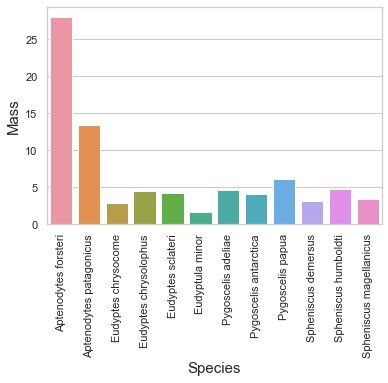

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="species", y="mass", data=penguins_df_copy)
ax.set_xlabel("Species", fontsize = 15)
ax.set_ylabel("Mass", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Smallest Species

Inspired by our lesson https://eeob-biodata.github.io/BCB546X-python/03-starting-with-data/
How to print just the first row of grouped data https://www.delftstack.com/howto/python-pandas/get-first-row-of-dataframe-pandas/

In [13]:
sorted_data = penguins_df_copy.groupby('mass')

In [14]:
sorted_data.min()

,species,mol_weight,gc_count
mass,,,
1.60,Eudyptula minor,42491.6408,49.256343
2.80,Eudyptes chrysocome,42475.5753,51.181102
3.20,Spheniscus demersus,42431.5490,48.293963
3.40,Spheniscus magellanicus,42459.6021,48.206474
4.10,Pygoscelis antarctica,42404.5423,47.769029
4.25,Eudyptes sclateri,42475.5753,50.831146
4.50,Eudyptes chrysolophus,42445.5493,50.918635
4.60,Pygoscelis adeliae,42458.6140,49.081365
4.75,Spheniscus humboldti,42399.5520,49.256343


## Q1 - Smallest mass species?

In [15]:
# Sort my minimum and use iloc to extract first item
df = sorted_data.min()
row_1=df.iloc[0:1]
print("The smallest species is:")
print(row_1)

The smallest species is:
              species  mol_weight   gc_count
mass                                        
1.6   Eudyptula minor  42491.6408  49.256343


## Q2 - Range of smallest mass species?

The range of the smallest species is endemic to Australia, New Zealand, and the Pacific Ocean. They are found around the southern Austrailian coast, South Solitary Islands, and coasts of New Zealand. Source: https://animaldiversity.org/accounts/Eudyptula_minor/#geographic_range

## 9. Visualization with Molecular Weight and GC Content

Inspired from class https://eeob-biodata.github.io/BCB546X-python/05-seaborn-viz/

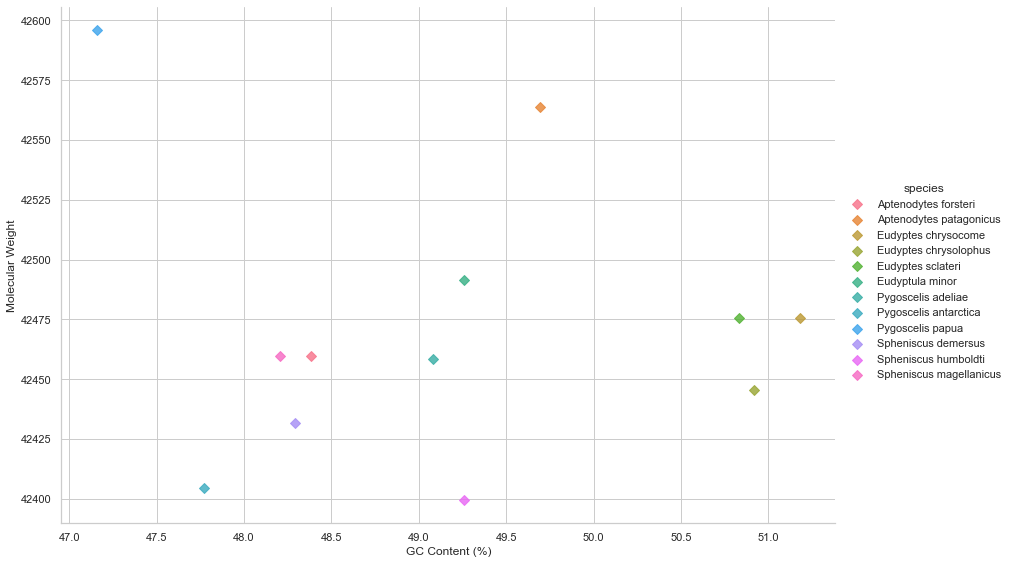

In [16]:
# Adjusted alpha to make the diamonds a bit darker and easier to see, colored by species
my_fig = sns.lmplot(x="gc_count", y="mol_weight", data=penguins_df_copy, 
                    fit_reg=False, height=8, aspect=1.5, 
                    scatter_kws={'alpha':0.8,"s": 50}, 
                    hue='species', markers='D')
my_fig.set_axis_labels('GC Content (%)', 'Molecular Weight')

## 10. Save new dataframe

Inspired by: https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03

In [17]:
penguins_df_copy.to_csv('penguins_mass_cytb.csv')

# 11. Get Codon Usage from Sequence

Inpsired by: https://stackoverflow.com/questions/5774099/defining-a-function-that-counts-relative-frequency-of-amino-acids

In [18]:
# Copy desired sequence to become "rna"
rna = ("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")
seq = rna

In [19]:
# RNA "degernated" codon table from from http://en.wikipedia.org/wiki/Genetic_code
degenerated = (('GCU', 'GCC', 'GCA', 'GCG'),
               ('UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG'),
               ('CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'),
               ('AAA', 'AAG'), ('AAU', 'AAC'), ('GAU', 'GAC'),
               ('UUU', 'UUC'), ('UGU', 'UGC'), ('CCU', 'CCC', 'CCA', 'CCG'),
               ('CAA', 'CAG'), ('UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC'),
               ('GAA', 'GAG'), ('ACU', 'ACC', 'ACA', 'ACG'),
               ('GGU', 'GGC', 'GGA', 'GGG'), ('CAU', 'CAC'), ('UAU', 'UAC'),
               ('AUU', 'AUC', 'AUA'), ('GUU', 'GUC', 'GUA', 'GUG'),
               ('UAA', 'UGA', 'UAG'))

In [20]:
# Prepare dictionary "degen_dict" to query and count codons
degen_dict = {}
for codons in degenerated:
    for codon in codons:
        degen_dict[codon] = codons

In [21]:
# Query codons
max_seq = len(seq)
query_codons = [seq[i:i+3] for i in range(0, max_seq, 3)]

In [22]:
# Count codons
counts = defaultdict(int)
for codon in query_codons:
    counts[codon] +=1

In [23]:
# "data" actually calculates the frequency of codons
data = {}
for codon in query_codons:
    if codon in  degen_dict:
        totals = sum(counts[deg] for deg in degen_dict[codon])
        frequency = float(counts[codon]) / totals
    else:
        frequency = 1.00

    data[codon] = frequency
    print(codon,frequency)

ATG 1.0
GCC 0.5416666666666666
CCA 0.5454545454545454
AAT 1.0
CTC 1.0
CGA 0.42857142857142855
AAA 0.9
TCC 1.0
CAT 1.0
CCC 0.45454545454545453
CTC 1.0
CTA 1.0
AAA 0.9
ATA 1.0
ATT 1.0
AAT 1.0
AAC 1.0
TCC 1.0
CTA 1.0
ATC 1.0
GAC 1.0
CTG 1.0
CCC 0.45454545454545453
ACC 0.5925925925925926
CCA 0.5454545454545454
TCA 1.0
AAC 1.0
ATC 1.0
TCT 1.0
GCC 0.5416666666666666
TGA 1.0
TGA 1.0
AAC 1.0
TTC 1.0
GGA 0.391304347826087
TCT 1.0
CTC 1.0
CTA 1.0
GGC 0.5652173913043478
ATC 1.0
TGC 1.0
CTA 1.0
ACT 1.0
ACA 0.4074074074074074
CAA 0.875
ATT 1.0
TTA 1.0
ACC 0.5925925925925926
GGC 0.5652173913043478
CTC 1.0
CTA 1.0
CTA 1.0
GCT 1.0
ATA 1.0
CAC 1.0
TAC 1.0
ACT 1.0
GCA 0.4583333333333333
GAC 1.0
ACA 0.4074074074074074
ACC 0.5925925925925926
CTA 1.0
GCC 0.5416666666666666
TTC 1.0
TCC 1.0
TCA 1.0
GTC 1.0
GCC 0.5416666666666666
CAC 1.0
ACA 0.4074074074074074
TGC 1.0
CGA 0.42857142857142855
AAC 1.0
GTA 1.0
CAG 0.125
TAC 1.0
GGC 0.5652173913043478
TGA 1.0
CTG 1.0
ATC 1.0
CGC 0.5714285714285714
AAC 1.0
CTA 1.0